In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

In [2]:
with open('cachan_weather.json') as json_file:
    data_list = json.load(json_file)

In [3]:
weather_dict = {
    'datetime': [],
    'timestamp': [],
    'weather_main': [],
    'weather_description': [],
    'temp': [],
    'humidity': [],
    'pressure': [],
    'wind_speed': [],
    'wind_deg': [],
    'cloudiness': [],
    'rain_1h': [],
    'rain_3h': [],
    'snow_1h': [],
    'snow_3h': []
}

for data in data_list:
        weather_dict['timestamp'].append(data['dt'])
        weather_dict['datetime'].append(datetime.datetime.fromtimestamp(data['dt']))

        weather_dict['weather_main'].append(data['weather'][0]['main'])
        weather_dict['weather_description'].append(data['weather'][0]['description'])
        weather_dict['temp'].append(data['main']['temp'])
        weather_dict['humidity'].append(data['main']['humidity'])
        weather_dict['pressure'].append(data['main']['pressure'])
        weather_dict['wind_speed'].append(data['wind']['speed'])
        weather_dict['wind_deg'].append(data['wind']['deg'])
        weather_dict['cloudiness'].append(data['clouds']['all'])
            
        try:
            weather_dict['rain_1h'].append(data['rain']['1h'])
        except KeyError:
            weather_dict['rain_1h'].append(0)

        try:
            weather_dict['rain_3h'].append(data['rain']['3h'])
        except KeyError:
            weather_dict['rain_3h'].append(0)

        try:
            weather_dict['snow_1h'].append(data['snow']['1h'])
        except KeyError:
            weather_dict['snow_1h'].append(0)

        try:
            weather_dict['snow_3h'].append(data['snow']['3h'])
        except KeyError:
            weather_dict['snow_3h'].append(0)


weather_df = pd.DataFrame.from_dict(weather_dict)

In [4]:
weather_df

,datetime,timestamp,weather_main,weather_description,temp,humidity,pressure,wind_speed,wind_deg,cloudiness,rain_1h,rain_3h,snow_1h,snow_3h
0,2022-03-18 00:26:39,1647559599,Clear,clear sky,279.27,85,1036,4.12,360,0,0.0,0,0.0,0
1,2022-03-18 01:00:01,1647561601,Clear,clear sky,279.09,85,1036,3.60,20,0,0.0,0,0.0,0
2,2022-03-18 16:45:03,1647618303,Clear,clear sky,288.32,33,1036,9.77,60,0,0.0,0,0.0,0
3,2022-03-21 17:58:10,1647881890,Clear,clear sky,290.82,50,1026,3.09,140,0,0.0,0,0.0,0
4,2022-03-21 18:15:03,1647882903,Clear,clear sky,290.35,52,1026,3.09,150,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20346,2022-10-11 15:30:07,1665495007,Clouds,few clouds,290.63,62,1024,3.60,30,20,0.0,0,0.0,0
20347,2022-10-11 15:45:48,1665495948,Clouds,few clouds,291.06,61,1024,3.60,40,20,0.0,0,0.0,0
20348,2022-10-11 16:00:49,1665496849,Clouds,few clouds,291.08,61,1024,3.60,40,20,0.0,0,0.0,0
20349,2022-10-11 16:15:48,1665497748,Clouds,few clouds,291.11,60,1024,3.09,50,20,0.0,0,0.0,0


# 1. Temperature and Humidity relation

In [5]:
def kelvinToCelsius(kelvin):
    return kelvin - 273.15

weather_df["temp celcius"] = kelvinToCelsius(weather_df["temp"])

print(weather_df["temp celcius"].max())
print(weather_df["temp celcius"].min())

weather_df

39.94
-0.9399999999999977


,datetime,timestamp,weather_main,weather_description,temp,humidity,pressure,wind_speed,wind_deg,cloudiness,rain_1h,rain_3h,snow_1h,snow_3h,temp celcius
0,2022-03-18 00:26:39,1647559599,Clear,clear sky,279.27,85,1036,4.12,360,0,0.0,0,0.0,0,6.12
1,2022-03-18 01:00:01,1647561601,Clear,clear sky,279.09,85,1036,3.60,20,0,0.0,0,0.0,0,5.94
2,2022-03-18 16:45:03,1647618303,Clear,clear sky,288.32,33,1036,9.77,60,0,0.0,0,0.0,0,15.17
3,2022-03-21 17:58:10,1647881890,Clear,clear sky,290.82,50,1026,3.09,140,0,0.0,0,0.0,0,17.67
4,2022-03-21 18:15:03,1647882903,Clear,clear sky,290.35,52,1026,3.09,150,0,0.0,0,0.0,0,17.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20346,2022-10-11 15:30:07,1665495007,Clouds,few clouds,290.63,62,1024,3.60,30,20,0.0,0,0.0,0,17.48
20347,2022-10-11 15:45:48,1665495948,Clouds,few clouds,291.06,61,1024,3.60,40,20,0.0,0,0.0,0,17.91
20348,2022-10-11 16:00:49,1665496849,Clouds,few clouds,291.08,61,1024,3.60,40,20,0.0,0,0.0,0,17.93
20349,2022-10-11 16:15:48,1665497748,Clouds,few clouds,291.11,60,1024,3.09,50,20,0.0,0,0.0,0,17.96


In [6]:
df1 = weather_df[['humidity', 'temp celcius', 'datetime']]
df1.set_index(df1.columns[-1])

,humidity,temp celcius
datetime,,
2022-03-18 00:26:39,85,6.12
2022-03-18 01:00:01,85,5.94
2022-03-18 16:45:03,33,15.17
2022-03-21 17:58:10,50,17.67
2022-03-21 18:15:03,52,17.20
...,...,...
2022-10-11 15:30:07,62,17.48
2022-10-11 15:45:48,61,17.91
2022-10-11 16:00:49,61,17.93


Text(0.5, 1.0, 'Relation between humidity and temperature over time')

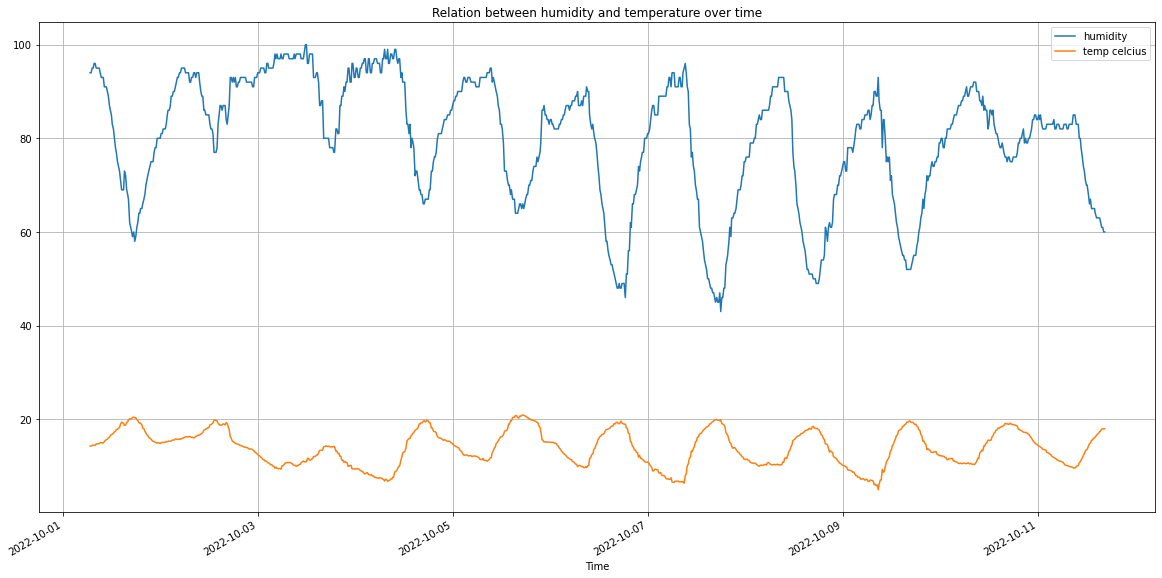

In [7]:
df1[-1000:].plot(x = 'datetime', y = ['humidity', "temp celcius"], kind="line", figsize=(20, 10), grid= True)
plt.xlabel('Time')
#plt.ylabel()
plt.title('Relation between humidity and temperature over time')

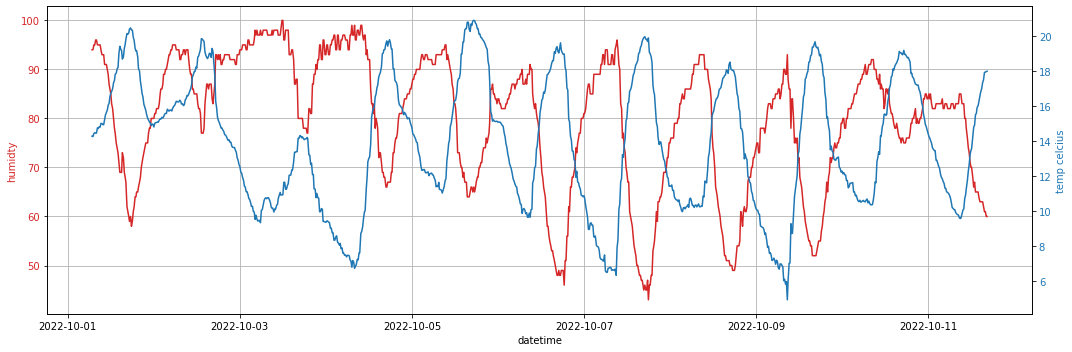

In [8]:
temp_hum = df1[-1000:]

fig, ax1 = plt.subplots(figsize=(15, 5))

color = 'tab:red'
ax1.set_xlabel('datetime')
ax1.set_ylabel('humidty', color=color)
ax1.plot(temp_hum['datetime'], temp_hum['humidity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('temp celcius', color=color)  # we already handled the x-label with ax1
ax2.plot(temp_hum['datetime'], temp_hum['temp celcius'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

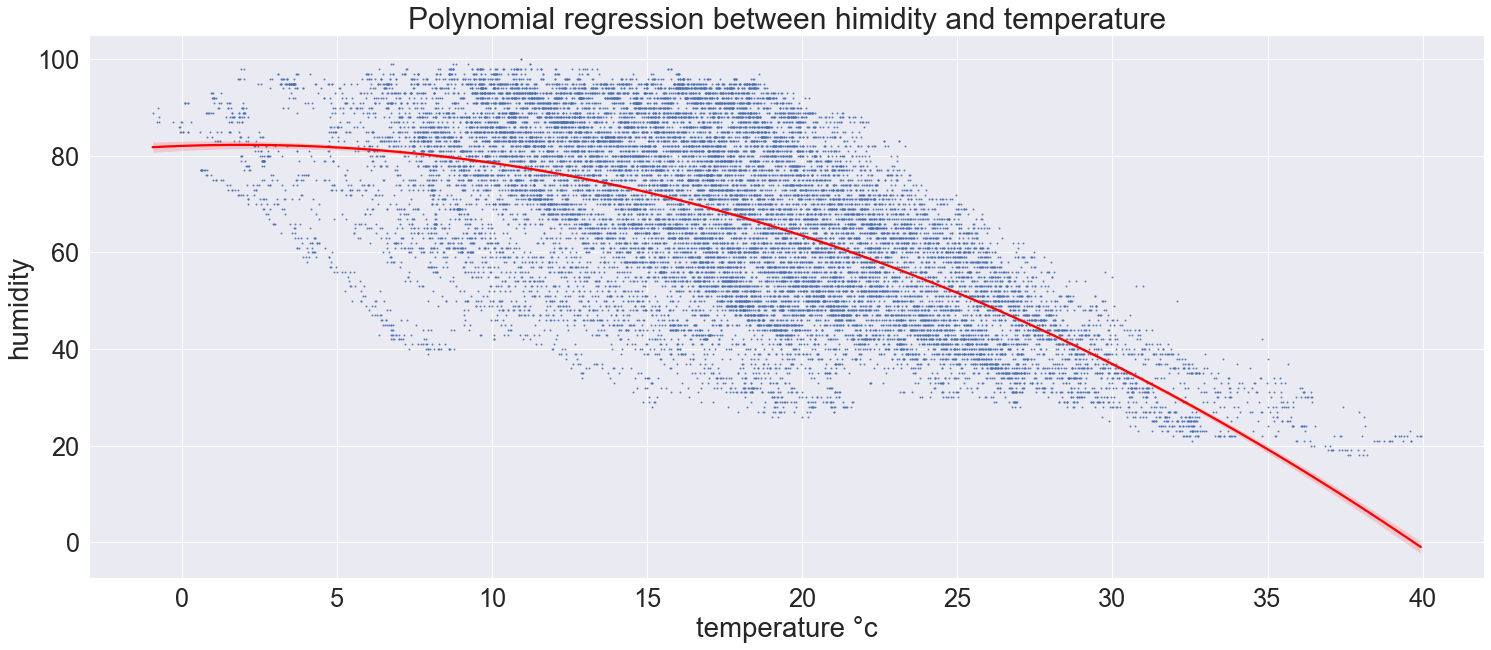

In [24]:
# draw regplot
sns.regplot(x ='temp celcius', y ='humidity', data = df1, scatter=True, order=2,
            scatter_kws={'s':1}, line_kws={"color": "red"})
plt.gcf().set_size_inches(25,10)
plt.ylabel('humidity')
plt.xlabel('temperature °c')
plt.title('Polynomial regression between humidity and temperature', fontdict={'fontsize': 30})
plt.show()

# 2) Rank the levels of the weather_main and weather_description factor based on their temperature

In [10]:
df = weather_df[['weather_main', 'weather_description', 'temp celcius']]

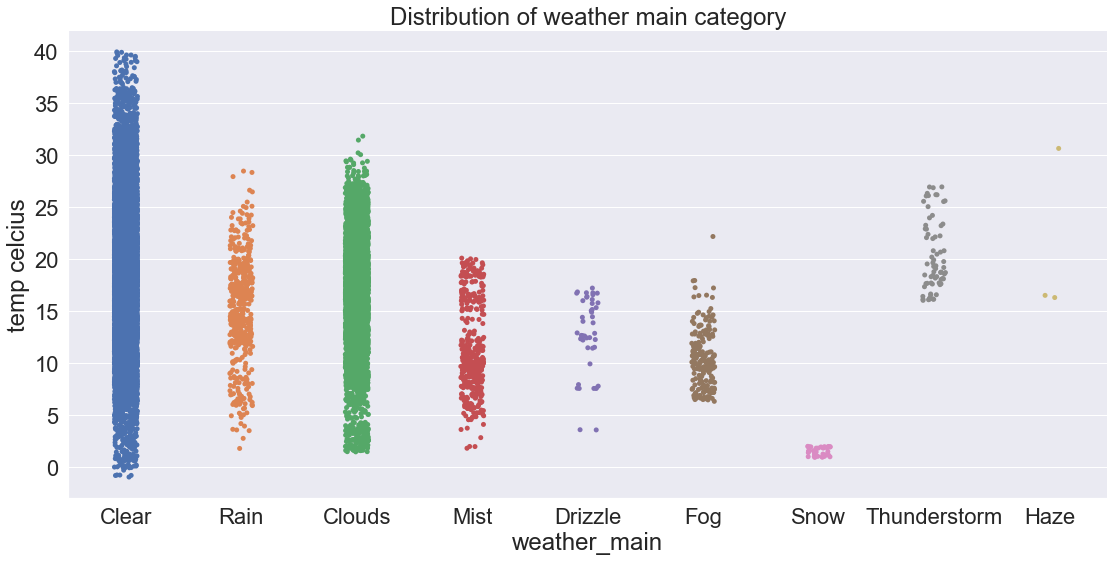

In [11]:
sns.set(font_scale=2)
sns.catplot(data=df, x="weather_main", y="temp celcius", height=8, aspect=2)
plt.title('Distribution of weather main category')
plt.show()

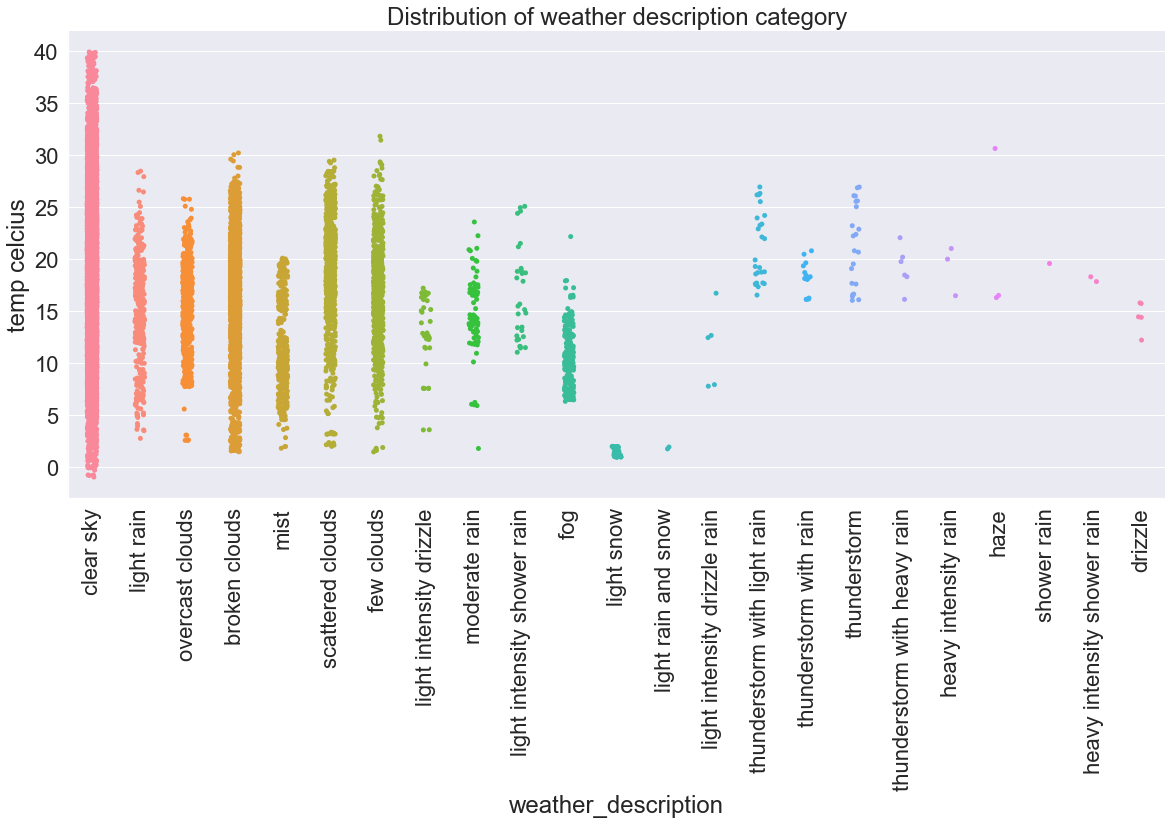

In [27]:
sns.set(font_scale=2)
sns.catplot(data=df, x="weather_description", y="temp celcius", height=8, aspect=2.2)
plt.title('Distribution of weather description category')
plt.xticks(rotation=90)
plt.show()

### With each average of weather_main and weather_description categories

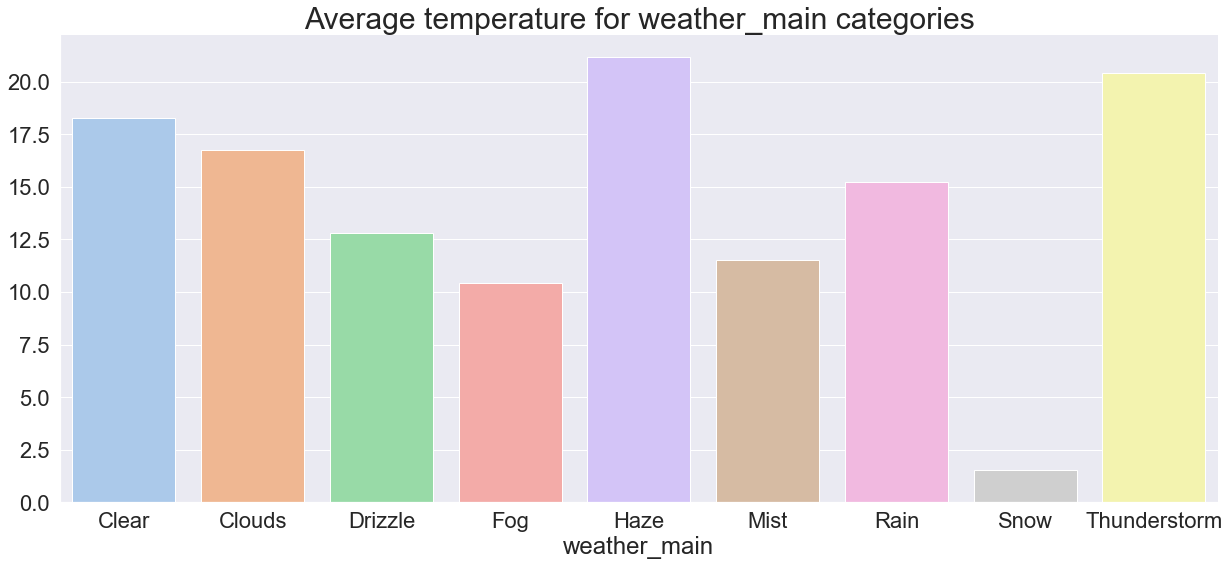

In [28]:
ave_wm = df.groupby('weather_main')['temp celcius'].mean()
ave_wm = pd.DataFrame(ave_wm)
ave_wm = ave_wm.T

# plot
sns.set(font_scale=2)
sns.catplot(data=ave_wm, kind="bar", height=8, aspect=2.2, palette = 'pastel')
#plt.xticks(rotation=90)
plt.title('Average temperature for weather_main categories', fontdict={'fontsize': 30})
plt.show()

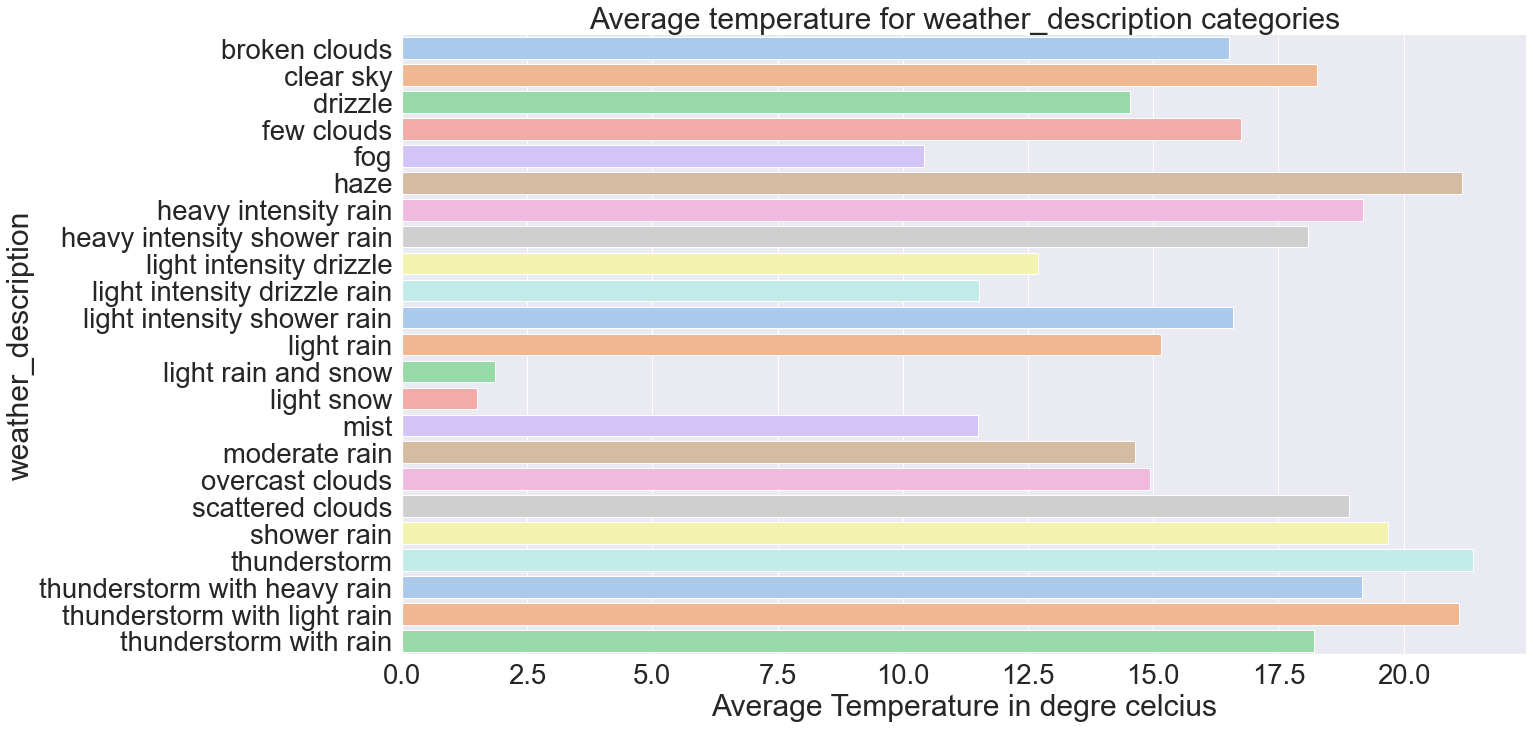

In [35]:
# get mean of every single the weather description group
ave_wd = df.groupby('weather_description')['temp celcius'].mean()
ave_wd = pd.DataFrame(ave_wd)
ave_wd = ave_wd.T

# plot
sns.set(font_scale=2.5)
sns.catplot(data=ave_wd, kind="bar", height=10, aspect=2.2, orient='h', palette = 'pastel')
plt.xlabel('Average Temperature in degre celcius')
plt.title('Average temperature for weather_description categories', fontdict={'fontsize': 30})
plt.show()

# 3. Is there a moment of the day when it tends to rain more often?

In [15]:
import time

timestamp = weather_df["timestamp"][0]
datetime = time.strftime('%H', time.localtime(timestamp))

H=[]
for i in range (len(weather_df["timestamp"])):
    timestamp = weather_df["timestamp"][i]
    datetime = time.strftime('%H', time.localtime(timestamp))
    H.append([datetime, weather_df['rain_1h'][i], weather_df['rain_3h'][i]])

def distrib(liste):
    Heures1=np.zeros(24)
    for i in range(len(liste)-2):
        Heures1[int(liste[i][0])]+=liste[i][1]
    return(Heures1)

d = distrib(H)
d

array([ 7.73, 25.2 , 10.28, 16.69, 14.98,  7.05, 17.21,  7.6 , 11.85,
       10.35, 10.78, 14.89,  8.86, 14.97, 10.63, 11.71,  7.52, 28.99,
       40.06, 65.09, 27.39,  7.35,  7.68,  6.43])

In [16]:
h24 = np.arange(start=0, stop=24, step=1)

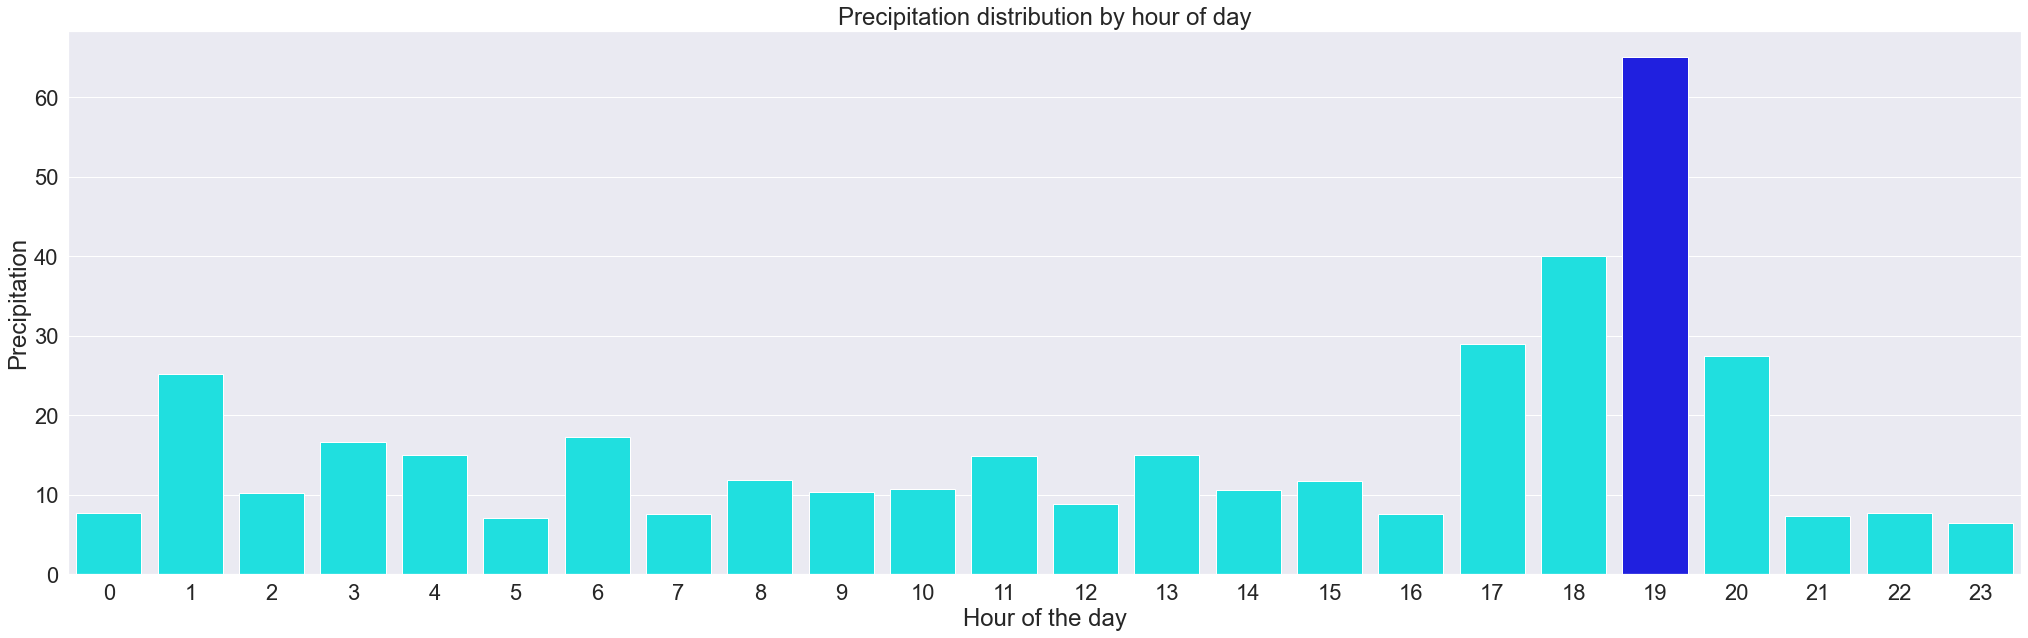

In [26]:
clrs = ['cyan' if (x < max(d)) else 'blue' for x in d ] # highest precipitation in blue, other in grey

sns.set(font_scale=2)
sns.barplot(x=h24, y=d,ci=None, palette=clrs)
plt.gcf().set_size_inches(35,10)
plt.title('Precipitation distribution by hour of day')
plt.ylabel('Precipitation')
plt.xlabel('Hour of the day')
plt.show()